In [157]:
#import the dataset
import pandas as pd
df=pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])
movie_titles=pd.read_csv('Movie_Id_Titles')

In [158]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [159]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [160]:
#merge the two dataset
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [161]:
#get the count of rating per movie
rating_cnt_per_movie=pd.DataFrame(df.groupby('title')['user_id'].count())
rating_cnt_per_movie=rating_cnt_per_movie.rename(columns={'user_id':'rating_count'})
rating_cnt_per_movie.head()

,rating_count
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


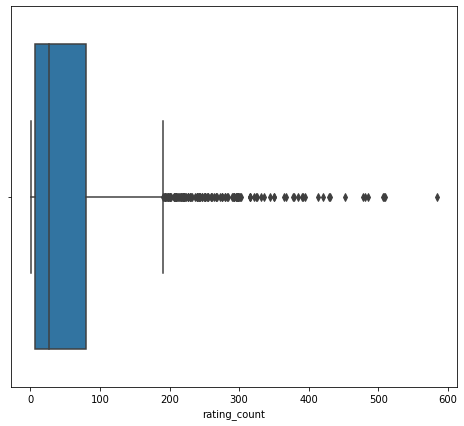

In [162]:
#boxplot to see the count of ratings dispersion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(rating_cnt_per_movie['rating_count'])
plt.show()

In [163]:
#describe rating_count column of the dataset
rating_cnt_per_movie['rating_count'].describe()

count    1664.000000
mean       60.097957
std        80.963482
min         1.000000
25%         7.000000
50%        27.000000
75%        80.250000
max       584.000000
Name: rating_count, dtype: float64

In [164]:
#create pivot table to generate the matrix
movies_pivot=df.pivot_table(index='user_id',columns='title',values='rating')
movies_pivot.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
starwars_user_ratings = movies_pivot['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [170]:
#get the correlation of the movie dataset with starwars movie
starwars_corr=pd.DataFrame(movies_pivot.corrwith(starwars_user_ratings),columns=['Correlation'])
starwars_corr.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [171]:
#merge starwars_corr with the rating_count dataset
starwars_corr=pd.merge(starwars_corr,rating_cnt_per_movie,on='title')
starwars_corr=starwars_corr.rename(columns={'user_id':'rating_count'})
starwars_corr.head()

,Correlation,rating_count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [172]:
#get the data from correlation of starwars where count of rating is greater than 80 because as per the 
#dispersion ,75% of the movies are having rating count as 80
starwars_corr=starwars_corr[starwars_corr['rating_count'] > 80]

In [173]:
#Recommendation of movies based on starwars watch
starwars_corr.sort_values(by='Correlation',ascending=False).head(10)

,Correlation,rating_count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Same recommendation approach for Lair Liar

In [174]:
liarliar_user_ratings = movies_pivot['Liar Liar (1997)']
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [175]:
liarliar_corr=pd.DataFrame(movies_pivot.corrwith(liarliar_user_ratings),columns=['Correlation'])
liarliar_corr.head()

C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kapasiya\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [176]:
liarliar_corr=pd.merge(liarliar_corr,rating_cnt_per_movie,on='title')
liarliar_corr=liarliar_corr.rename(columns={'user_id':'rating_count'})
liarliar_corr.head()

,Correlation,rating_count
title,,
'Til There Was You (1997),0.118913,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41


In [177]:
liarliar_corr[liarliar_corr['rating_count'] > 80].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,rating_count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Demolition Man (1993),0.442948,92
